# Overlap with other tools

## Benchmark comparison BUSCO vs fDOG-Assembly

In [52]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

In [53]:
tools_ref = ['bbh', 'domainoid', 'ensamble', 'hieranoid', 'inparanoid', 'metaphors', 'oma_pairs', 'orthoffgc', 'orthofinder', 'orthoinspector', 'panther', 'rsd', 'sonicparanoid']
#tools = ['busco_metazoa_augustus', 'busco_metazoa_metaeuk', 'fdog_assembly_metazoa_augustus_galga_v2','fdog_assembly_metazoa_augustus', 'fdog_assembly_metazoa_augustus_fly', 'fdog_assembly_metazoa_metaeuk', 'fdog_assembly_metazoa_sens_metaeuk']
#tools = ['busco_metazoa_augustus_gallus_v2', 'busco_metazoa_metaeuk_gallus_v2', 'busco_metazoa_augustus', 'busco_metazoa_metaeuk','fdog_assembly_metazoa_augustus', 'fdog_assembly_metazoa_augustus_gallus_v2', 'fdog_assembly_metazoa_metaeuk', 'fdog_assembly_metazoa_metaeuk_gallus_v2']
tools = ['busco_metazoa_augustus_gallus_v2', 'busco_metazoa_metaeuk_gallus_v2', 'fdog_assembly_metazoa_augustus_gallus_v2', 'fdog_assembly_metazoa_metaeuk_gallus_v2']
path = '../../results/qfo_input/'

In [54]:
def create_set_of_sets(path):
    file = open(path, 'r')
    pairs_set = set()
    lines = file.readlines()
    for line in lines:
        line = line.rstrip()
        pairs = frozenset(line.split('\t'))
        pairs_set.add(pairs)
    #print(len(lines))
    print(len(pairs_set))
    return pairs_set

In [55]:
list_of_sets_ref = []
dict_of_sets = {}
nr_orthologs_ref = []
for i in tools_ref:
    pairs_set = create_set_of_sets(path + i + '.tsv')
    list_of_sets_ref.append(pairs_set)
    dict_of_sets[i] = pairs_set
    nr_orthologs_ref.append(len(pairs_set))

8738
8945
8168
8422
8487
8979
7973
8616
9372
9006
8906
8606
9126


In [56]:
intersection_all = set.intersection(*list_of_sets_ref)
print(len(list_of_sets_ref))
print(len(intersection_all))

13
5669


In [57]:
list_of_sets = []
for t in tools:
    print(t)
    pairs_set = create_set_of_sets(path + t + '.tsv')
    list_of_sets.append(pairs_set)
    dict_of_sets[t] = pairs_set

busco_metazoa_augustus_gallus_v2
8567
busco_metazoa_metaeuk_gallus_v2
8621
fdog_assembly_metazoa_augustus_gallus_v2
8243
fdog_assembly_metazoa_metaeuk_gallus_v2
8099


In [58]:
sensitivity_tools = []
nr_orthologs_tools = []
for i in range(len(tools)):
    print(tools[i])
    intersection_size = len(list_of_sets[i].intersection(intersection_all))
    print(intersection_size)
    print(intersection_size/len(intersection_all))
    sensitivity_tools.append(intersection_size/len(intersection_all))
    nr_orthologs_tools.append(len(list_of_sets[i]))

busco_metazoa_augustus_gallus_v2
5304
0.9356147468689363
busco_metazoa_metaeuk_gallus_v2
5402
0.9529017463397425
fdog_assembly_metazoa_augustus_gallus_v2
5359
0.9453166343270418
fdog_assembly_metazoa_metaeuk_gallus_v2
5188
0.9151525842300229


In [59]:
# Investigate pairs found exclusively by BUSCO or fDOG-Assembly Augustus
intersection_busco_aug = list_of_sets[0].intersection(intersection_all)
intersection_fdog_ass_aug = list_of_sets[2].intersection(intersection_all)
#print(intersection_busco_aug - intersection_fdog_ass_aug)
print(len(intersection_busco_aug - intersection_fdog_ass_aug))
print(len(intersection_fdog_ass_aug - intersection_busco_aug))

209
264


In [60]:
# Investigate pairs found exclusively by BUSCO MetaEuk or fDOG-Assembly MetaEuk
intersection_busco_meta = list_of_sets[1].intersection(intersection_all)
intersection_fdog_ass_meta = list_of_sets[3].intersection(intersection_all)
#print(intersection_busco_meta - intersection_fdog_ass_meta)
print(len(intersection_busco_meta - intersection_fdog_ass_meta))
print(len(intersection_fdog_ass_meta - intersection_busco_meta))

289
75


In [61]:
# Invetsigate genes that were not found by booth augustus
missing_busco_aug = intersection_all - list_of_sets[0]
missing_fdog_ass_aug = intersection_all - list_of_sets[2]
print(len(missing_busco_aug))
print(len(missing_fdog_ass_aug))
print(missing_busco_aug.intersection(missing_fdog_ass_aug))
print(len(missing_busco_aug.intersection(missing_fdog_ass_aug)))

missed_augustus = missing_busco_aug.intersection(missing_fdog_ass_aug)
with open("exclusive_gene_lists/exclusive_protein_based_pairs_augustus_tools.tsv", 'w') as out:
    for i in missed_augustus:
        a,b = i
        out.write(a + "\t" + b + "\n")

365
310
{frozenset({'Q9NEZ7', 'Q8NFJ9'}), frozenset({'Q96C86', 'Q8K4F7'}), frozenset({'Q9H0E2', 'Q5ZK05'}), frozenset({'Q95Y44', 'O75937'}), frozenset({'Q7Z392', 'Q5ZI89'}), frozenset({'O94817', 'Q9VTU1'}), frozenset({'Q9NXG2', 'O61900'}), frozenset({'P25093', 'P16930'}), frozenset({'Q09248', 'Q13561'}), frozenset({'Q9H9C1', 'Q9VAG4'}), frozenset({'P29084', 'O96881'}), frozenset({'A7RKL8', 'O94817'}), frozenset({'P61758', 'E1BXR1'}), frozenset({'Q5ZLP2', 'Q96GX9'}), frozenset({'P53701', 'Q5F339'}), frozenset({'Q9N598', 'Q9NZ43'}), frozenset({'C0VXV6', 'Q9H2W6'}), frozenset({'Q96A65', 'Q62824'}), frozenset({'O95149', 'F6TAQ8'}), frozenset({'Q9NRP0', 'Q5ZJR3'}), frozenset({'Q9H1A3', 'F1NG91'}), frozenset({'Q568Y6', 'Q9NPF5'}), frozenset({'P22570', 'Q9V3T9'}), frozenset({'O95801', 'A0A3Q2TU15'}), frozenset({'Q9P013', 'D6WLQ5'}), frozenset({'T1FM85', 'P49366'}), frozenset({'Q15050', 'Q8I937'}), frozenset({'Q8N5U6', 'Q5XI59'}), frozenset({'P09001', 'A0A1D5P7B5'}), frozenset({'Q14696', 'Q5ZK

In [62]:
# Invetsigate genes that were not found by booth metaeuk
missing_busco_meta = intersection_all - list_of_sets[1]
missing_fdog_ass_meta = intersection_all - list_of_sets[3]
print(len(missing_busco_meta))
print(len(missing_fdog_ass_meta))
print(missing_busco_aug.intersection(missing_fdog_ass_meta))
print(len(missing_busco_aug.intersection(missing_fdog_ass_meta)))

missed_metaeuk = missing_busco_meta.intersection(missing_fdog_ass_meta)
with open("exclusive_gene_lists/exclusive_protein_based_pairs_metaeuk_tools.tsv", 'w') as out:
    for i in missed_metaeuk:
        a,b = i
        out.write(a + "\t" + b + "\n")

267
481
{frozenset({'A7RER7', 'Q8IV38'}), frozenset({'Q96C86', 'Q8K4F7'}), frozenset({'Q96H20', 'Q18258'}), frozenset({'Q9H0E2', 'Q5ZK05'}), frozenset({'Q95Y44', 'O75937'}), frozenset({'Q7Z392', 'Q5ZI89'}), frozenset({'Q95QD5', 'Q9Y6N1'}), frozenset({'P62718', 'Q02543'}), frozenset({'Q9NXG2', 'O61900'}), frozenset({'P25093', 'P16930'}), frozenset({'B0BNA7', 'Q13347'}), frozenset({'Q9N5R9', 'Q9Y5B9'}), frozenset({'Q09248', 'Q13561'}), frozenset({'A7RHG8', 'Q9GZL7'}), frozenset({'P61758', 'E1BXR1'}), frozenset({'Q5ZLP2', 'Q96GX9'}), frozenset({'P53701', 'Q5F339'}), frozenset({'Q9N598', 'Q9NZ43'}), frozenset({'O95149', 'F6TAQ8'}), frozenset({'Q9NRP0', 'Q5ZJR3'}), frozenset({'Q9H1A3', 'F1NG91'}), frozenset({'O95801', 'A0A3Q2TU15'}), frozenset({'Q23316', 'Q92542'}), frozenset({'Q17796', 'O14964'}), frozenset({'Q23288', 'Q9H9C1'}), frozenset({'Q9UKD2', 'A0A8I5ZWZ6'}), frozenset({'Q8N5U6', 'Q5XI59'}), frozenset({'P09001', 'A0A1D5P7B5'}), frozenset({'Q14696', 'Q5ZKK4'}), frozenset({'Q9H814', '

In [63]:
# Invetsigate genes that were not found by all assembly_based runs
missed_all = missed_augustus.intersection(missed_metaeuk)
print(len(missed_all))
with open("exclusive_gene_lists/exclusive_protein_based_pairs_all.tsv", 'w') as out:
    for i in missed_all:
        a,b = i
        out.write(a + "\t" + b + "\n")

43


In [64]:
sensitivity_ref = []
for ref in range(len(tools_ref)):
    #print(ref)
    print(tools_ref[ref])
    ref_list = list_of_sets_ref[:ref] + list_of_sets_ref[ref+1:]
    intersection_all_others = set.intersection(*ref_list)
    intersection_size = len(list_of_sets_ref[ref].intersection(intersection_all_others))
    print(intersection_size)
    print(len(intersection_all_others))
    print(intersection_size/len(intersection_all_others))
    sensitivity_ref.append(intersection_size/len(intersection_all_others))

bbh
5669
5683
0.9975365124054196
domainoid
5669
5669
1.0
ensamble
5669
6442
0.8800062092517852
hieranoid
5669
5728
0.989699720670391
inparanoid
5669
5677
0.9985908050026422
metaphors
5669
6035
0.9393537696768849
oma_pairs
5669
5957
0.9516535168709082
orthoffgc
5669
5841
0.97055298750214
orthofinder
5669
5686
0.9970102004924376
orthoinspector
5669
5676
0.9987667371388301
panther
5669
5791
0.9789328268002072
rsd
5669
5815
0.9748925193465177
sonicparanoid
5669
5671
0.9996473285134897


In [65]:
# some statistical stuff
#Standartabweichung
std_dev = np.std(sensitivity_ref)
print(std_dev)

0.033324602818674526


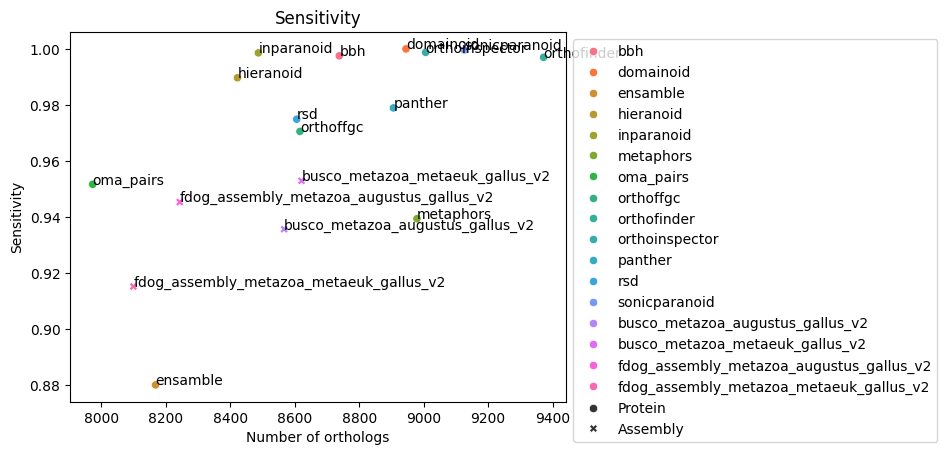

In [66]:
# Plot sensitivity 
tools_list = tools_ref + tools
sensitivity_list = sensitivity_ref + sensitivity_tools
base = []
nr_orthologs_list = nr_orthologs_ref + nr_orthologs_tools
for t in tools_list:
    if t in tools_ref:
        base.append('Protein')
    else:
        base.append('Assembly')
sensitivity_dict = {'tool': tools_list, 'sensitivity': sensitivity_list, 'nr_orthologs': nr_orthologs_list, 'base': base} 
sensitivity_df = pd.DataFrame(sensitivity_dict)
plt = sb.scatterplot(data=sensitivity_df, x="nr_orthologs", y="sensitivity", hue=tools_list, style=base)
sb.move_legend(plt, "upper left", bbox_to_anchor=(1, 1))

plt.set_title('Sensitivity')
#Set x-axis label
plt.set_xlabel('Number of orthologs')
#Set y-axis label
plt.set_ylabel('Sensitivity')


def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+0.02, point['y'], str(point['val']))

label_point(sensitivity_df.nr_orthologs, sensitivity_df.sensitivity, sensitivity_df.tool, plt.figure.gca())
plt.figure.savefig("Sensitivity_all_tools.svg", bbox_inches='tight')

In [30]:
#backup 06.05.24
315
342
#{frozenset({'A0A8J8XD13', 'Q99437'}), frozenset({'Q9NXG2', 'Q5M943'}), frozenset({'Q8IRE4', 'Q32P41'}), frozenset({'Q9VKJ4', 'Q9Y3B2'}), frozenset({'Q5M808', 'Q53FT3'}), frozenset({'A0A1D5PIR3', 'Q12768'}), frozenset({'Q9BTX3', 'A0A1D5PL82'}), frozenset({'F1NK93', 'Q9UJX4'}), frozenset({'P62851', 'F1NU56'}), frozenset({'A7SPN0', 'P51970'}), frozenset({'A0A8I6AE58', 'Q9GZN1'}), frozenset({'P51398', 'A7S9T5'}), frozenset({'Q99471', 'A7RUT5'}), frozenset({'T1FXS2', 'Q9Y2R4'}), frozenset({'Q19987', 'Q9BPX7'}), frozenset({'P51398', 'A0A0G2K264'}), frozenset({'Q9NZ43', 'Q9N598'}), frozenset({'A0A1D5PB45', 'Q969S3'}), frozenset({'A7RL51', 'O94923'}), frozenset({'Q99442', 'B2GUQ9'}), frozenset({'A0A1D5PWD8', 'P11182'}), frozenset({'P38024', 'P22234'}), frozenset({'Q6DHR8', 'Q96E22'}), frozenset({'Q9NQ89', 'A0A1D6UPU0'}), frozenset({'Q9BUE0', 'Q966M5'}), frozenset({'T1ECZ7', 'O95777'}), frozenset({'Q5ZKK4', 'Q14696'}), frozenset({'A0A1D5NWZ8', 'P52435'}), frozenset({'Q9V3T9', 'P22570'}), frozenset({'Q688Z3', 'Q8TDD1'}), frozenset({'F1NTL3', 'Q6AI08'}), frozenset({'A0A1L1RMC0', 'P25786'}), frozenset({'T1FUL4', 'O15091'}), frozenset({'Q9NXG2', 'O61900'}), frozenset({'P62314', 'B2RZB7'}), frozenset({'A0A0G2JWN4', 'Q5BKX5'}), frozenset({'Q53HI1', 'Q10045'}), frozenset({'Q92685', 'F1P0T5'}), frozenset({'B3DLX5', 'Q8N6T3'}), frozenset({'A0A3Q2TXQ2', 'Q9UBZ9'}), frozenset({'Q9BSU1', 'Q5ZKM4'}), frozenset({'Q9VMQ7', 'F1M086'}), frozenset({'P61758', 'E1BXR1'}), frozenset({'O94817', 'Q9VTU1'}), frozenset({'P61313', 'F1NQG5'}), frozenset({'Q15006', 'Q9VEQ2'}), frozenset({'Q561P4', 'Q9UJW0'}), frozenset({'O75586', 'A0A1L1RLU6'}), frozenset({'A4QNF8', 'Q9P0M9'}), frozenset({'Q13769', 'A0A1L1S0H5'}), frozenset({'T1FWH1', 'Q9NUY8'}), frozenset({'Q9H981', 'T1G220'}), frozenset({'E1C516', 'O94903'}), frozenset({'Q9H5U6', 'T1FMA3'}), frozenset({'Q96DI7', 'F1NUK8'}), frozenset({'Q3MHD2', 'F6X492'}), frozenset({'Q9UHA4', 'A0A452J856'}), frozenset({'F1NWG6', 'Q08AM6'}), frozenset({'Q9NZ63', 'D3ZKZ0'}), frozenset({'P41250', 'A0A1L1RX59'}), frozenset({'Q5F3N9', 'Q9H6K1'}), frozenset({'Q9H2G9', 'T1FA06'}), frozenset({'A0A1D5PY39', 'Q7Z3J2'}), frozenset({'Q9NVM9', 'A0A803J8A1'}), frozenset({'Q9U3S3', 'Q6I9Y2'}), frozenset({'A7SCU5', 'Q9BYC9'}), frozenset({'A0A8I5ZM35', 'Q8IYS2'}), frozenset({'G3V6U3', 'Q9H553'}), frozenset({'A0A1D5PGK2', 'Q9NWL6'}), frozenset({'P0C2W1', 'B4F739'}), frozenset({'A0A3Q2TU15', 'O95801'}), frozenset({'Q8INF2', 'Q96BW9'}), frozenset({'C0VXV6', 'Q9H2W6'}), frozenset({'A0AVI4', 'O17638'}), frozenset({'Q9BYD3', 'A7RJ96'}), frozenset({'D6WRF5', 'Q08J23'}), frozenset({'A0A1D5PY98', 'Q9GZZ9'}), frozenset({'P82912', 'B5DFS9'}), frozenset({'D3ZCD7', 'Q96S44'}), frozenset({'Q96EK5', 'Q5ZIL9'}), frozenset({'A0A1D5NW43', 'Q9BRG1'}), frozenset({'Q5EBE8', 'Q13347'}), frozenset({'P09001', 'A7SQV4'}), frozenset({'O00233', 'Q9WTV5'}), frozenset({'Q19906', 'Q2VPK5'}), frozenset({'Q0G841', 'O75575'}), frozenset({'Q5ZJE4', 'Q9H741'}), frozenset({'Q1L8Y7', 'Q9UQ13'}), frozenset({'O95149', 'A0A1D5NZ24'}), frozenset({'P50336', 'D3ZVN7'}), frozenset({'T1FMQ8', 'Q9BW27'}), frozenset({'Q8VHM6', 'O75575'}), frozenset({'P04843', 'E1C0F1'}), frozenset({'Q96DM3', 'A0A1D5P3A0'}), frozenset({'Q96A65', 'Q62824'}), frozenset({'F1NNQ3', 'Q9UBQ0'}), frozenset({'G5EBX4', 'Q9P055'}), frozenset({'Q13795', 'A0A8M2BDM9'}), frozenset({'F6VMK6', 'Q96MX6'}), frozenset({'E1BU15', 'Q9UQ13'}), frozenset({'Q9H6L2', 'T1EU95'}), frozenset({'Q13795', 'A7SAH6'}), frozenset({'A0A1D5P0D2', 'Q9HB07'}), frozenset({'Q15050', 'Q8I937'}), frozenset({'O15294', 'Q5GA13'}), frozenset({'O96881', 'P29084'}), frozenset({'A0A6I8SV11', 'P63272'}), frozenset({'P49366', 'T1FM85'}), frozenset({'F1NG91', 'Q9H1A3'}), frozenset({'Q9BTT4', 'R4GFY1'}), frozenset({'Q9XVT1', 'O95707'}), frozenset({'T1ELH7', 'Q8IWT0'}), frozenset({'O95900', 'Q9N3X3'}), frozenset({'P56282', 'T1FST1'}), frozenset({'A0A1D5P7F4', 'O15091'}), frozenset({'Q9Y3C0', 'E1BYD1'}), frozenset({'A0A452J811', 'Q9NV06'}), frozenset({'P04844', 'A0A1L1RL15'}), frozenset({'Q9H9C1', 'Q9VAG4'}), frozenset({'Q9GZU8', 'B1H137'}), frozenset({'F7FLA1', 'Q8TB61'}), frozenset({'O60832', 'F1P0Q8'}), frozenset({'Q5VZE5', 'A0A3Q2UCC5'}), frozenset({'Q9NPF5', 'Q568Y6'}), frozenset({'O95777', 'A7RIQ2'}), frozenset({'A7WK43', 'Q6GMV3'}), frozenset({'A7RST4', 'Q8TDD1'}), frozenset({'Q13561', 'Q09248'}), frozenset({'Q9Y224', 'A0A1D5P7R1'}), frozenset({'O94817', 'A7RKL8'}), frozenset({'Q9UBB6', 'A7S6S1'}), frozenset({'O00541', 'F1NP58'}), frozenset({'Q5ZJR3', 'Q9NRP0'}), frozenset({'T1ELP9', 'Q13084'}), frozenset({'Q8WTT2', 'Q6DRN3'}), frozenset({'Q9P2J5', 'E1C2I9'}), frozenset({'Q68CQ4', 'F1NHV1'}), frozenset({'D6WLQ5', 'Q9P013'}), frozenset({'F1NYL0', 'P49959'})}
139

139

In [67]:
def plot_frequency(list_of_sets_ref, test_set):
    pair_list = []
    occurence_list = []
    print(len(test_set))
    for i in test_set:
        occurence = 0
        for set_ref in list_of_sets_ref:
            if i in set_ref:
                occurence += 1
        pair = list(i)
        pair_list.append('_'.join(pair))
        occurence_list.append(occurence)
    data_dict = {'pair': pair_list, 'occurence': occurence_list}
    print(len(pair_list))
    df = pd.DataFrame(data_dict)
    plt = sb.displot(data=df, x="occurence", binwidth=1)
    plt.tight_layout()
    #plt.show()
    return df
    

8567
8567


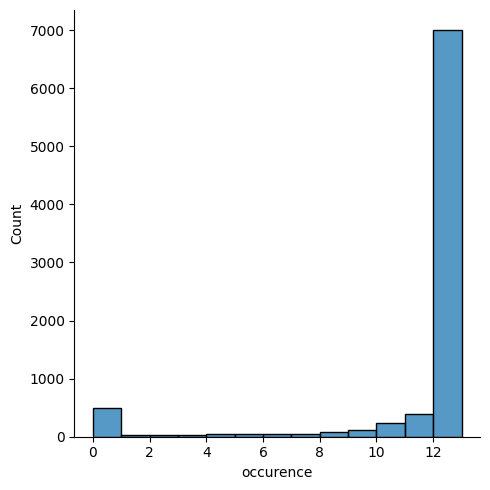

In [30]:
df_busco_augustus = plot_frequency(list_of_sets_ref, dict_of_sets["busco_metazoa_augustus_gallus_v2"])

8621
8621


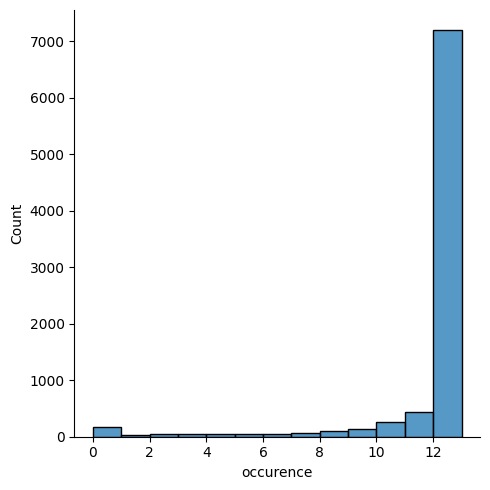

In [31]:
df_busco_metaeuk = plot_frequency(list_of_sets_ref, dict_of_sets["busco_metazoa_metaeuk_gallus_v2"])

8243
8243


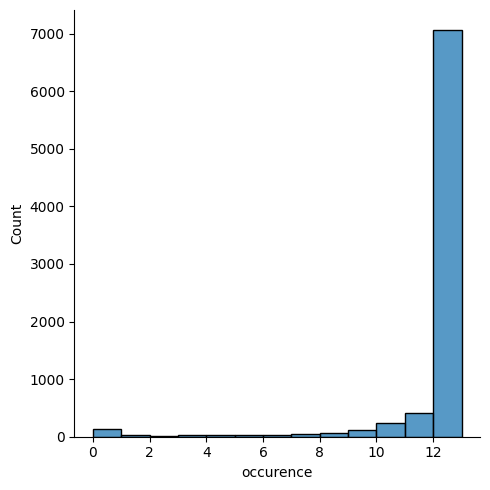

In [32]:
df_fdog_augustus = df_fdog_ass_augustus = plot_frequency(list_of_sets_ref, dict_of_sets["fdog_assembly_metazoa_augustus_gallus_v2"])

8099
8099


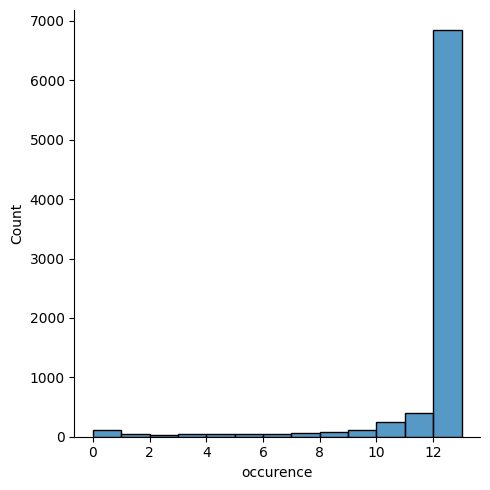

In [33]:
df_fdog_metaeuk = df_fdog_ass_augustus = plot_frequency(list_of_sets_ref, dict_of_sets["fdog_assembly_metazoa_metaeuk_gallus_v2"])

In [68]:
def plot_frequency_all_evaluation_assembly_based(list_of_sets_ref, set_dict, tools):
    pair_list = []
    occurence_list = []
    tool_list = []
    self_assignment = 0
    for t in tools:
        test_set = set_dict[t]
        print(self_assignment)
        print(t)
        self_assignment = 0
        for i in test_set:
            occurence = 0
            #if len(i) == 1:
             #   self_assignment += 1
              #  continue
            for set_ref in list_of_sets_ref:
                if i in set_ref:
                    occurence += 1
            pair = list(i)
            pair_list.append('_'.join(pair))
            occurence_list.append(occurence)
            tool_list.append(t)
    data_dict = {'pair': pair_list, 'occurence': occurence_list, 'tool': tool_list}
    df = pd.DataFrame(data_dict)
    ax = sb.displot(data=df, x="occurence", hue='tool', binwidth=1, multiple="dodge")
    #ax = sb.displot(data=df, x="occurence", hue='tool', kind="kde", )
    sb.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    ax.tight_layout()
    #plt.show()
    ax.savefig('comparison_with_other_qfo22_tools_pair_distribution.png', dpi=900, bbox_inches='tight')
    #print(self_assignment)
    return df

0
busco_metazoa_augustus_gallus_v2
0
busco_metazoa_metaeuk_gallus_v2
0
fdog_assembly_metazoa_augustus_gallus_v2
0
fdog_assembly_metazoa_metaeuk_gallus_v2


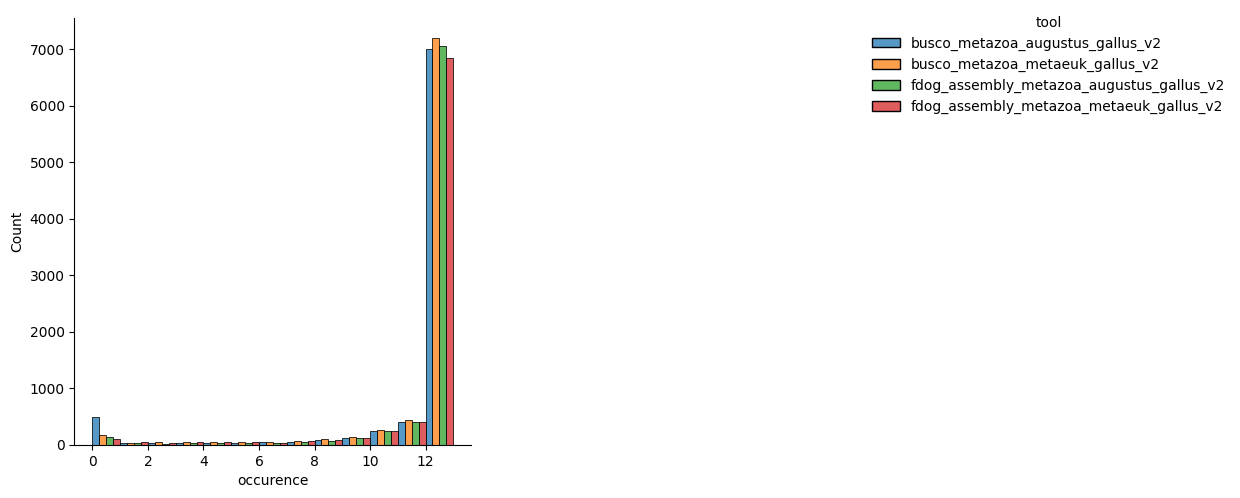

In [69]:
df_all = plot_frequency_all_evaluation_assembly_based(list_of_sets_ref, dict_of_sets, tools)

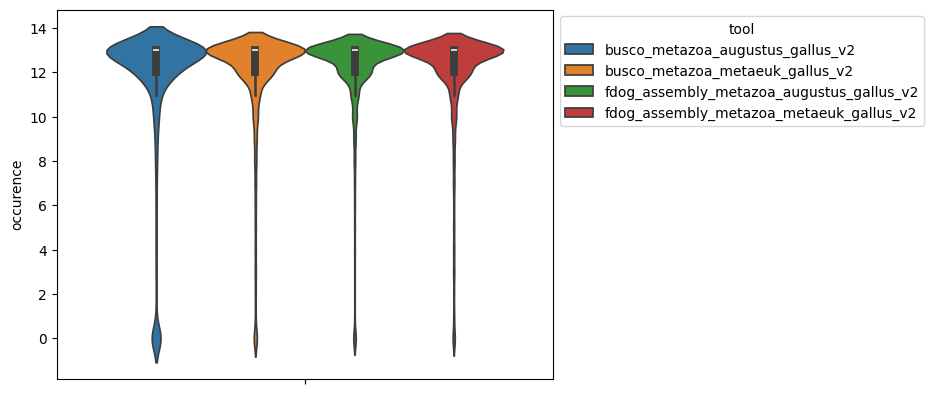

In [70]:
# as a violin plot
violin = sb.violinplot(data=df_all,y='occurence', hue='tool')
sb.move_legend(violin, "upper left", bbox_to_anchor=(1, 1))

In [37]:
#display(df_all)
df_filtered = df_all[df_all['occurence'] < 1].copy()
#display(df_filtered)
exclusive_pairs = df_filtered['pair'].copy()

In [99]:
def found_by_cutoff(df_occ, cutoff, tools):
    dict_sensitivity = {}
    occ_total = df_occ['tool'].value_counts()
    #display(occ_total)
    df_filtered = df_occ[df_occ['occurence'] >= cutoff].copy()
    occ = df_filtered['tool'].value_counts()
    #display(occ)
    tool_name = []
    orthologs = []
    orthologs_supported_by_n_tools = []
    fraction = []
    for tool in tools:
        print(tool)
        tool_name.append(tool)
        print(occ_total[tool])
        print(occ[tool])
        print(occ[tool]/occ_total[tool])
        orthologs.append(occ_total[tool])
        orthologs_supported_by_n_tools.append(occ[tool])
        fraction.append(occ[tool]/occ_total[tool])
    df_occ = pd.DataFrame({'Tool': tool_name, 'No_orthologs': orthologs, 'Orthologs_supported': orthologs_supported_by_n_tools, 'Fraction': fraction})
    return df_occ
    

In [72]:
found_by_cutoff(df_all, 2, tools)

busco_metazoa_augustus_gallus_v2
8567
8051
0.939768880588304
busco_metazoa_metaeuk_gallus_v2
8621
8419
0.9765688435216332
fdog_assembly_metazoa_augustus_gallus_v2
8243
8088
0.9811961664442558
fdog_assembly_metazoa_metaeuk_gallus_v2
8099
7949
0.981479194962341


,pair,occurence,tool
0,P57088_T1G2N1,13,busco_metazoa_augustus_gallus_v2
1,Q9NVU0_E1C9J0,13,busco_metazoa_augustus_gallus_v2
2,Q9H9E3_B7QAG5,12,busco_metazoa_augustus_gallus_v2
3,T1ES19_Q8TDP1,5,busco_metazoa_augustus_gallus_v2
4,P82650_T1FXZ5,13,busco_metazoa_augustus_gallus_v2
...,...,...,...
33525,O75616_A7S8A8,13,fdog_assembly_metazoa_metaeuk_gallus_v2
33526,Q96L58_A1Z7G9,13,fdog_assembly_metazoa_metaeuk_gallus_v2
33527,Q99471_D6X3H0,13,fdog_assembly_metazoa_metaeuk_gallus_v2
33528,T1EEE4_Q9BZE4,13,fdog_assembly_metazoa_metaeuk_gallus_v2


In [73]:
found_by_cutoff(df_all, 6, tools)

busco_metazoa_augustus_gallus_v2
8567
7917
0.9241274658573596
busco_metazoa_metaeuk_gallus_v2
8621
8242
0.9560375826470247
fdog_assembly_metazoa_augustus_gallus_v2
8243
7978
0.9678515103724372
fdog_assembly_metazoa_metaeuk_gallus_v2
8099
7781
0.960735893320163


,pair,occurence,tool
0,P57088_T1G2N1,13,busco_metazoa_augustus_gallus_v2
1,Q9NVU0_E1C9J0,13,busco_metazoa_augustus_gallus_v2
2,Q9H9E3_B7QAG5,12,busco_metazoa_augustus_gallus_v2
4,P82650_T1FXZ5,13,busco_metazoa_augustus_gallus_v2
5,Q96NB3_F1NPL1,11,busco_metazoa_augustus_gallus_v2
...,...,...,...
33525,O75616_A7S8A8,13,fdog_assembly_metazoa_metaeuk_gallus_v2
33526,Q96L58_A1Z7G9,13,fdog_assembly_metazoa_metaeuk_gallus_v2
33527,Q99471_D6X3H0,13,fdog_assembly_metazoa_metaeuk_gallus_v2
33528,T1EEE4_Q9BZE4,13,fdog_assembly_metazoa_metaeuk_gallus_v2


In [81]:
def plot_frequency_all_evaluation_protein_based(list_of_sets_ref, set_dict, tools):
    pair_list = []
    occurence_list = []
    tool_list = []
    counter_t = 0
    print(tools)
    for t in tools:
        test_set = set_dict[t]
        for i in test_set:
            occurence = 0
            counter_list = 0
            for set_ref in list_of_sets_ref:
                if counter_list == counter_t:
                    counter_list += 1
                    continue
                if i in set_ref:
                    occurence += 1
                counter_list += 1
            pair = list(i)
            pair_list.append('_'.join(pair))
            occurence_list.append(occurence)
            tool_list.append(t)
        counter_t += 1
    data_dict = {'pair': pair_list, 'occurence': occurence_list, 'tool': tool_list}
    df = pd.DataFrame(data_dict)
    return df

In [85]:
df_ref_tools = plot_frequency_all_evaluation_protein_based(list_of_sets_ref,dict_of_sets, tools_ref)
#display(df_ref_tools)
found_by_cutoff(df_ref_tools, 6, tools_ref)
found_by_cutoff(df_ref_tools, 2, tools_ref)

['bbh', 'domainoid', 'ensamble', 'hieranoid', 'inparanoid', 'metaphors', 'oma_pairs', 'orthoffgc', 'orthofinder', 'orthoinspector', 'panther', 'rsd', 'sonicparanoid']
bbh
8738
8645
0.9893568322270543
domainoid
8945
8788
0.982448295136948
ensamble
8168
7632
0.9343780607247796
hieranoid
8422
8370
0.9938256946093564
inparanoid
8487
8459
0.9967008365735831
metaphors
8979
8228
0.9163603964806771
oma_pairs
7973
7896
0.990342405618964
orthoffgc
8616
8478
0.983983286908078
orthofinder
9372
8858
0.9451557831839522
orthoinspector
9006
8867
0.9845658449922274
panther
8906
8462
0.9501459690096564
rsd
8606
8389
0.9747850336974204
sonicparanoid
9126
8860
0.9708525093140478
bbh
8738
8737
0.9998855573357748
domainoid
8945
8917
0.9968697596422582
ensamble
8168
7900
0.9671890303623898
hieranoid
8422
8414
0.9990501068629779
inparanoid
8487
8483
0.9995286909390833
metaphors
8979
8556
0.9528900768459739
oma_pairs
7973
7956
0.997867803837953
orthoffgc
8616
8602
0.9983751160631383
orthofinder
9372
9253
0.987

,pair,occurence,tool
0,P57088_T1G2N1,12,bbh
1,E1C9J0_Q9NVU0,12,bbh
2,Q9H9E3_B7QAG5,11,bbh
3,P82650_T1FXZ5,12,bbh
4,Q96NB3_F1NPL1,10,bbh
...,...,...,...
113339,O75616_A7S8A8,12,sonicparanoid
113340,Q96L58_A1Z7G9,12,sonicparanoid
113341,Q99471_D6X3H0,12,sonicparanoid
113342,T1EEE4_Q9BZE4,12,sonicparanoid


In [41]:
def found_by_less(df_occ, cutoff, tools):
    occ_total = df_occ['tool'].value_counts()
    display(occ_total)
    df_filtered = df_occ[df_occ['occurence'] <= cutoff].copy()
    occ = df_filtered['tool'].value_counts()
    display(occ)
    for tool in tools:
        print(tool)
        print(occ_total[tool])
        print(occ[tool])
        print(occ[tool]/occ_total[tool])
    return df_filtered

In [42]:
df_not_found = found_by_less(df_all, 0, tools)
df_not_found[['gene1', 'gene2']] = df_not_found['pair'].str.split('_', n=1, expand=True)
display(df_not_found)

tool
busco_metazoa_metaeuk_gallus_v2             8621
busco_metazoa_augustus_gallus_v2            8567
fdog_assembly_metazoa_augustus_gallus_v2    8243
fdog_assembly_metazoa_metaeuk_gallus_v2     8099
Name: count, dtype: int64

tool
busco_metazoa_augustus_gallus_v2            492
busco_metazoa_metaeuk_gallus_v2             168
fdog_assembly_metazoa_augustus_gallus_v2    132
fdog_assembly_metazoa_metaeuk_gallus_v2     110
Name: count, dtype: int64

busco_metazoa_augustus_gallus_v2
8567
492
0.057429671997198554
busco_metazoa_metaeuk_gallus_v2
8621
168
0.01948729845725554
fdog_assembly_metazoa_augustus_gallus_v2
8243
132
0.016013587286182216
fdog_assembly_metazoa_metaeuk_gallus_v2
8099
110
0.013581923694283245


,pair,occurence,tool,gene1,gene2
8,Q19545_O94761,0,busco_metazoa_augustus_gallus_v2,Q19545,O94761
9,P22570_Q7JRP4,0,busco_metazoa_augustus_gallus_v2,P22570,Q7JRP4
41,A0A1D5PUC0_Q9UHV9,0,busco_metazoa_augustus_gallus_v2,A0A1D5PUC0,Q9UHV9
44,P78537_A0A8M2BLA3,0,busco_metazoa_augustus_gallus_v2,P78537,A0A8M2BLA3
67,Q9H5U6_Q9NAQ4,0,busco_metazoa_augustus_gallus_v2,Q9H5U6,Q9NAQ4
...,...,...,...,...,...
33280,R4GFL3_Q9VBU4,0,fdog_assembly_metazoa_metaeuk_gallus_v2,R4GFL3,Q9VBU4
33345,Q6BEV3_Q53HI1,0,fdog_assembly_metazoa_metaeuk_gallus_v2,Q6BEV3,Q53HI1
33402,F6UTK5_Q9UBP6,0,fdog_assembly_metazoa_metaeuk_gallus_v2,F6UTK5,Q9UBP6
33472,A9UMG7_Q9Y5Q8,0,fdog_assembly_metazoa_metaeuk_gallus_v2,A9UMG7,Q9Y5Q8


# Human Proteom benchmark

In [86]:
tools_ref = ['bbh', 'domainoid', 'ensamble', 'hieranoid', 'inparanoid', 'metaphors', 'oma_pairs', 'orthoffgc', 'orthofinder', 'orthoinspector', 'panther', 'rsd', 'sonicparanoid']
tools_human_proteom = ['fdog_assembly_human_proteom_augustus']
path = '../../results/qfo_input/human_proteom/'

In [87]:
list_of_sets_ref = []
dict_of_sets = {}
for i in tools_ref:
    pairs_set = create_set_of_sets(path + i + '.tsv')
    list_of_sets_ref.append(pairs_set)
    dict_of_sets[i] = pairs_set

24542
42426
99141
30048
35322
42582
38401
24914
40415
32360
53433
24741
50280


In [88]:
intersection_all = set.intersection(*list_of_sets_ref)
print(len(list_of_sets_ref))
print(len(intersection_all))

13
14345


In [89]:
list_of_sets = []
for t in tools_human_proteom:
    print(t)
    pairs_set = create_set_of_sets(path + t + '.tsv')
    list_of_sets.append(pairs_set)
    dict_of_sets[t] = pairs_set

fdog_assembly_human_proteom_augustus
30502


In [90]:
for i in range(len(tools_human_proteom)):
    print(tools_human_proteom[i])
    intersection_size = len(list_of_sets[i].intersection(intersection_all))
    not_found = intersection_all - list_of_sets[i] 
    print(intersection_size)
    print(intersection_size/len(intersection_all))

fdog_assembly_human_proteom_augustus
12515
0.8724294179156501


In [91]:
import pandas as pd
# Investigation of those cases
#print(not_found)
# I tested a few cases and recognized that some of those genes are in the overlap table 
#load overlap table to find out how many cases are really present in the table and 'just a cut-off' issues -> also find out the range of overlaps
fa_augustus_human_proteom = pd.read_csv('../overlap_tables/fdog_ass_human_proteom_augustus_overlap_gff_files_rat_nema.tsv', delimiter='\t')
df_reduced = fa_augustus_human_proteom[['GeneID','uniprotID']].copy()
geneids = df_reduced['GeneID'].tolist()
uniprot = df_reduced['uniprotID'].tolist()
print(len(geneids))
print(len(uniprot))
pairs_table = set()
for i in range(0,len(geneids)):
    pairs = frozenset([geneids[i], uniprot[i]])
    pairs_table.add(pairs)
print(len(pairs_table))
in_overlap_table = pairs_table.intersection(not_found)
# Genes found in overlap table but were kicked out due to overlap cutoff
print(len(in_overlap_table))
print(len(not_found))
not_found_no_overlap = not_found - in_overlap_table
print(not_found_no_overlap)

# wie viele davon sind von welcher Spezies?? (bis jetzt alle Fälle die ich raus gezogen haben von Ratte)
# Q6PEY1 -> huge lcr coverage 

67272
67272
41144
206
1830
{frozenset({'P97590', 'P47929'}), frozenset({'A7RSR7', 'P39210'}), frozenset({'Q02108', 'P19686'}), frozenset({'P16219', 'A7RMA8'}), frozenset({'Q86W42', 'A7SWJ5'}), frozenset({'P09467', 'P19112'}), frozenset({'O08781', 'Q9HA38'}), frozenset({'O75419', 'A7RF94'}), frozenset({'A7RTW7', 'Q96K37'}), frozenset({'P25093', 'P16930'}), frozenset({'A7T6P2', 'O14734'}), frozenset({'A7RY32', 'Q8TBP6'}), frozenset({'A7S415', 'O60934'}), frozenset({'A7S078', 'A2RUC4'}), frozenset({'A7RER6', 'O60678'}), frozenset({'A7S7R3', 'P26885'}), frozenset({'A7SI64', 'P19387'}), frozenset({'A7SV11', 'Q6P1X6'}), frozenset({'Q9NZ08', 'Q9JJ22'}), frozenset({'P62076', 'Q9Y5L4'}), frozenset({'P09417', 'A7S0R5'}), frozenset({'P61604', 'A7RHS8'}), frozenset({'O60507', 'Q3KR92'}), frozenset({'A7SJ73', 'Q9Y3I1'}), frozenset({'Q5I0D1', 'Q9HC38'}), frozenset({'A7SX53', 'Q7L5Y9'}), frozenset({'A0A8I6A7A1', 'Q6ZMW3'}), frozenset({'A7RHE6', 'Q9NX04'}), frozenset({'P10768', 'A7S5U3'}), frozenset({

30502
30502


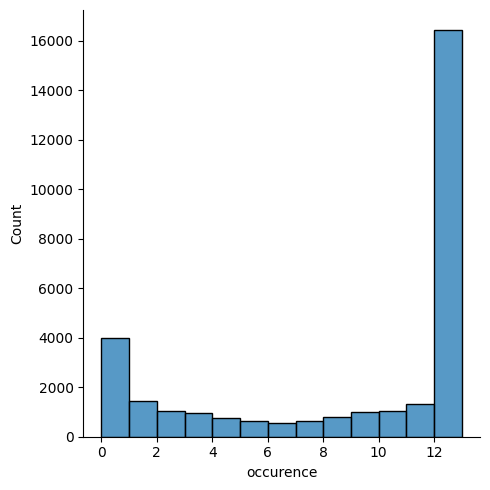

In [92]:
df_fdog_ass_human_proteom = plot_frequency(list_of_sets_ref, dict_of_sets["fdog_assembly_human_proteom_augustus"])

0
fdog_assembly_human_proteom_augustus


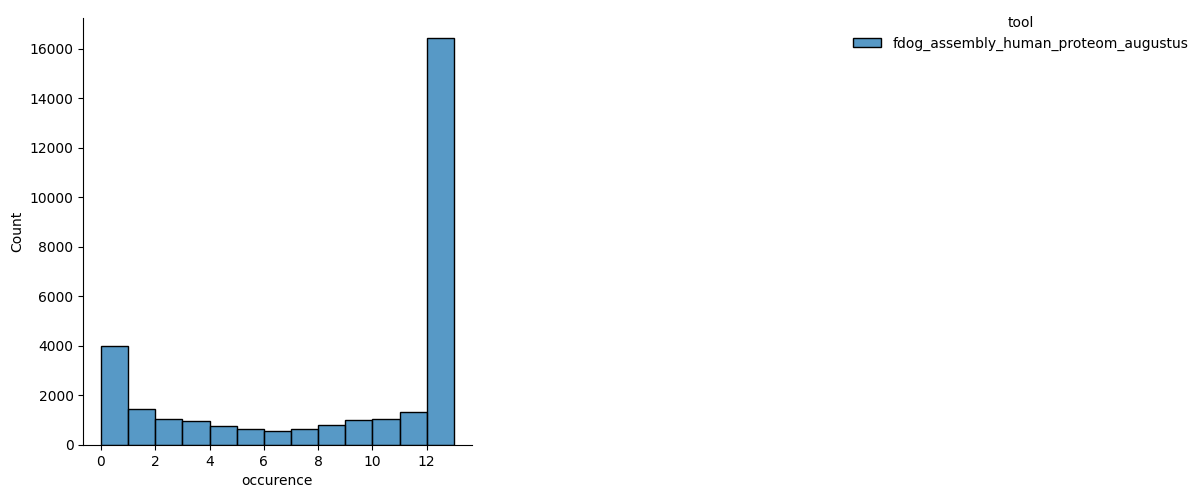

In [93]:
df_all = plot_frequency_all(list_of_sets_ref, dict_of_sets, tools_human_proteom)

In [94]:
found_by_cutoff(df_all, 2, tools_human_proteom)

fdog_assembly_human_proteom_augustus
30502
25093
0.8226673660743558


,pair,occurence,tool
0,A0A075B6H7_D3ZYE2,4,fdog_assembly_human_proteom_augustus
1,P08217_P00774,13,fdog_assembly_human_proteom_augustus
2,Q8IVG5_A0A0G2JVT8,11,fdog_assembly_human_proteom_augustus
3,Q02078_Q2MJT0,13,fdog_assembly_human_proteom_augustus
4,A7S764_Q5SYB0,5,fdog_assembly_human_proteom_augustus
...,...,...,...
30497,Q6P689_Q5T9L3,13,fdog_assembly_human_proteom_augustus
30498,A2VCK2_A0A8I5ZZ01,13,fdog_assembly_human_proteom_augustus
30499,P22894_A7T286,4,fdog_assembly_human_proteom_augustus
30500,B1WC94_Q8IXW0,13,fdog_assembly_human_proteom_augustus


In [101]:
df_ass_occ = found_by_cutoff(df_all, 6, tools_human_proteom)

fdog_assembly_human_proteom_augustus
30502
21747
0.7129696413349944


In [96]:
df_not_found = found_by_less(df_all, 0, tools_human_proteom)
df_not_found[['gene1', 'gene2']] = df_not_found['pair'].str.split('_', n=1, expand=True)
display(df_not_found)

tool
fdog_assembly_human_proteom_augustus    30502
Name: count, dtype: int64

tool
fdog_assembly_human_proteom_augustus    3973
Name: count, dtype: int64

fdog_assembly_human_proteom_augustus
30502
3973
0.13025375385220642


,pair,occurence,tool,gene1,gene2
25,A7SY72_P07858,0,fdog_assembly_human_proteom_augustus,A7SY72,P07858
36,Q494X3_A0A8I5ZKS7,0,fdog_assembly_human_proteom_augustus,Q494X3,A0A8I5ZKS7
38,A0A8I6GKS8_Q9H0K1,0,fdog_assembly_human_proteom_augustus,A0A8I6GKS8,Q9H0K1
48,O60271_A7RNC3,0,fdog_assembly_human_proteom_augustus,O60271,A7RNC3
52,Q9P0L2_A0A8I6GDY5,0,fdog_assembly_human_proteom_augustus,Q9P0L2,A0A8I6GDY5
...,...,...,...,...,...
30462,P52294_A7T055,0,fdog_assembly_human_proteom_augustus,P52294,A7T055
30477,D3ZES1_Q8IUK5,0,fdog_assembly_human_proteom_augustus,D3ZES1,Q8IUK5
30478,Q8N3S3_A7RQE6,0,fdog_assembly_human_proteom_augustus,Q8N3S3,A7RQE6
30483,M0RDW4_Q9UKL2,0,fdog_assembly_human_proteom_augustus,M0RDW4,Q9UKL2


In [97]:
# How do the reference tools overlap with each other?
for ref in range(len(tools_ref)):
    #print(ref)
    print(tools_ref[ref])
    ref_list = list_of_sets_ref[:ref] + list_of_sets_ref[ref+1:]
    intersection_all_others = set.intersection(*ref_list)
    intersection_size = len(list_of_sets_ref[ref].intersection(intersection_all_others))
    print(intersection_size)
    print(len(intersection_all_others))
    print(intersection_size/len(intersection_all_others))

bbh
14345
14386
0.9971500069512026
domainoid
14345
14345
1.0
ensamble
14345
16177
0.8867527971811832
hieranoid
14345
14524
0.9876755714679152
inparanoid
14345
14353
0.9994426252351425
metaphors
14345
15480
0.9266795865633075
oma_pairs
14345
14654
0.9789136072062236
orthoffgc
14345
14754
0.9722787040802494
orthofinder
14345
14392
0.9967342968315731
orthoinspector
14345
14376
0.9978436282693378
panther
14345
14745
0.9728721600542557
rsd
14345
14959
0.9589544755665486
sonicparanoid
14345
14350
0.9996515679442509


In [100]:
df_ref_tools = plot_frequency_all_evaluation_protein_based(list_of_sets_ref,dict_of_sets, tools_ref)
#display(df_ref_tools)
found_by_cutoff(df_ref_tools, 6, tools_ref)
df_occ = found_by_cutoff(df_ref_tools, 2, tools_ref)

['bbh', 'domainoid', 'ensamble', 'hieranoid', 'inparanoid', 'metaphors', 'oma_pairs', 'orthoffgc', 'orthofinder', 'orthoinspector', 'panther', 'rsd', 'sonicparanoid']
bbh
24542
23655
0.9638578762937006
domainoid
42426
28176
0.6641210578418895
ensamble
99141
23566
0.23770185896853976
hieranoid
30048
25360
0.8439829605963791
inparanoid
35322
26896
0.7614517864220599
metaphors
42582
24621
0.5782020572072707
oma_pairs
38401
24967
0.6501653602770762
orthoffgc
24914
22798
0.9150678333467127
orthofinder
40415
27689
0.6851169120376098
orthoinspector
32360
27930
0.8631025957972805
panther
53433
26336
0.49287893249490017
rsd
24741
22053
0.8913544319146356
sonicparanoid
50280
28081
0.5584924423229912
bbh
24542
24447
0.9961290848341618
domainoid
42426
34497
0.8131098854476029
ensamble
99141
32369
0.32649458851534685
hieranoid
30048
27277
0.9077808839190629
inparanoid
35322
30454
0.8621822093879169
metaphors
42582
31174
0.7320933727866235
oma_pairs
38401
29513
0.768547694070467
orthoffgc
24914
2411

,Tool,No_orthologs,Orthologs_supported,Fraction
0,fdog_assembly_human_proteom_augustus,30502,21747,0.712970
0,bbh,24542,24447,0.996129
1,domainoid,42426,34497,0.813110
2,ensamble,99141,32369,0.326495
3,hieranoid,30048,27277,0.907781
4,inparanoid,35322,30454,0.862182
5,metaphors,42582,31174,0.732093
6,oma_pairs,38401,29513,0.768548
7,orthoffgc,24914,24117,0.968010
8,orthofinder,40415,35243,0.872028


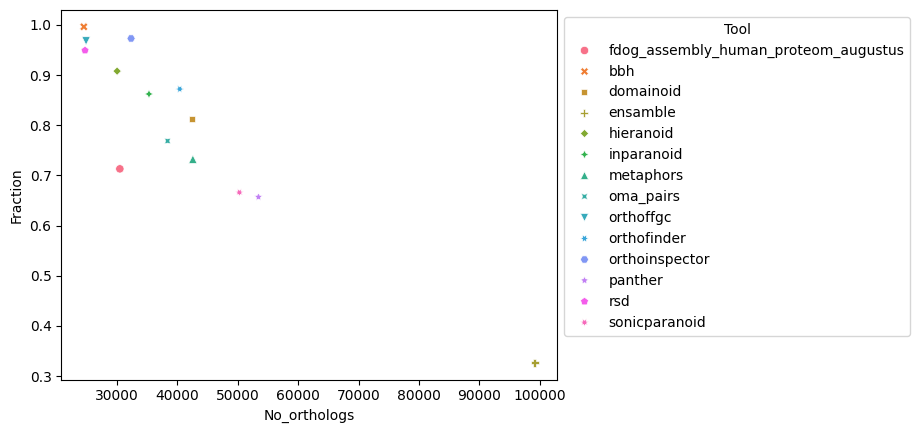

In [106]:
df_all_occ = pd.concat([df_ass_occ, df_occ])
display(df_all_occ)
plot = sb.scatterplot(data= df_all_occ, x='No_orthologs', y='Fraction', hue='Tool', style='Tool')
sb.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))